The first step involves importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


Read the data into a pandas dataframe


Detect the encoding


In [2]:

import chardet

# Path to downloaded file
file_path = 'C:/Users/adminepk.AD01/Documents/project/AviationData.csv'

# Function to detect file encoding
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
        return result['encoding']

# Detect encoding
encoding = detect_encoding(file_path)
print(f"The detected encoding is: {encoding}")

# Read the file with the detected encoding
df = pd.read_csv(file_path, encoding=encoding)

# Display some rows and basic info
print(df.head())
print(df.info())


The detected encoding is: Windows-1252


C:\Users\adminepk.AD01\AppData\Local\Temp\ipykernel_16364\4068029326.py:17: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)


         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

Identify percentage of missing values in each column

In [3]:
# Calculate percentage of missing values in each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Display the result
print("Percentage of missing values in each column:")
print(missing_percentages)


Percentage of missing values in each column:
Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured    

Deleting columns with more than 63% missing values

In [4]:
# Filter columns with more than 63% missing values
columns_to_drop = missing_percentages[missing_percentages > 63.8]

# Store information about dropped columns
dropped_columns_info = columns_to_drop.rename("Percentage of Missing Values").reset_index().rename(columns={"index": "Column"})
print("Columns with more than 63% missing values:")
print(dropped_columns_info)

# Drop the identified columns
df.drop(columns=columns_to_drop.index, inplace=True)

# Display the modified DataFrame
print("\nDataFrame after dropping columns with more than 63% missing values:")
print(df.head())

Columns with more than 63% missing values:
            Column  Percentage of Missing Values
0  FAR.Description                     63.974170
1         Schedule                     85.845268
2      Air.carrier                     81.271023

DataFrame after dropping columns with more than 63% missing values:
         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          Na

Percentage of Rows with more than 15% missing  values

In [5]:
# Calculate the threshold for the number of non-missing values
threshold = len(df.columns) * 0.15

# Count the number of missing values in each row
missing_values_per_row = df.isnull().sum(axis=1)

# Count the number of rows with more than 15% missing values
rows_with_greater_than_15_percent_missing = (missing_values_per_row > threshold).sum()

# Calculate the percentage of rows with more than 25% missing values
percentage_rows_with_greater_than_15_percent_missing = (rows_with_greater_than_15_percent_missing / len(df)) * 100

# Display the percentage
print(f"Percentage of rows with more than 15% missing values: {percentage_rows_with_greater_than_15_percent_missing:.2f}%")



Percentage of rows with more than 15% missing values: 37.19%


Dropping the rows with 15%>= missing values

In [6]:
# Calculate the threshold for the number of non-missing values
threshold = len(df.columns) * 0.15

# Filter rows with more than 15% missing values
rows_to_drop = df[df.isnull().sum(axis=1) > threshold].index

# Drop the identified rows
df_cleaned = df.drop(index=rows_to_drop)

# Display the modified DataFrame
print("DataFrame after dropping rows with more than 15% missing values:")
print(df_cleaned.head())

DataFrame after dropping rows with more than 15% missing values:
          Event.Id Investigation.Type Accident.Number  Event.Date  \
7   20020909X01562           Accident      SEA82DA022  1982-01-01   
8   20020909X01561           Accident      NYC82DA015  1982-01-01   
9   20020909X01560           Accident      MIA82DA029  1982-01-01   
11  20020909X01558           Accident      ATL82DKJ10  1982-01-01   
12  20020917X02148           Accident      FTW82FRJ07  1982-01-02   

            Location        Country Latitude Longitude Airport.Code  \
7        PULLMAN, WA  United States      NaN       NaN          NaN   
8   EAST HANOVER, NJ  United States      NaN       NaN          N58   
9   JACKSONVILLE, FL  United States      NaN       NaN          JAX   
11      TUSKEGEE, AL  United States      NaN       NaN          NaN   
12         HOMER, LA  United States      NaN       NaN          NaN   

          Airport.Name  ...    Engine.Type Purpose.of.flight  \
7   BLACKBURN AG STRIP  ...  

Identify number of rows and columns remaining

In [7]:
# Calculate the number of rows and columns remaining
num_rows_remaining, num_columns_remaining = df_cleaned.shape

# Display the number of rows and columns remaining
print(f"Number of rows remaining: {num_rows_remaining}")
print(f"Number of columns remaining: {num_columns_remaining}")
# Calculate the number of missing values in each column
missing_values_per_column = df.isnull().sum()

# Calculate the total number of missing values in the DataFrame
total_missing_values = df.isnull().sum().sum()

# Display the result
print("Number of missing values in each column:")
print(missing_values_per_column)
print(f"\nTotal number of missing values in the DataFrame: {total_missing_values}")


Number of rows remaining: 55834
Number of columns remaining: 28
Number of missing values in each column:
Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771

Dealing with missing values

In [8]:
# Fill `Location` with mode
df['Location'].fillna(df['Location'].mode()[0], inplace=True)

# Fill `Country` with mode
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

# Fill `Latitude` and `Longitude` with zeros
df['Latitude'].fillna(0, inplace=True)
df['Longitude'].fillna(0, inplace=True)

# Fill `Airport.Code` with mode
df['Airport.Code'].fillna(df['Airport.Code'].mode()[0], inplace=True)

# Fill `Airport.Name` with mode
df['Airport.Name'].fillna(df['Airport.Name'].mode()[0], inplace=True)

# Fill `Injury.Severity` with previous value
df['Injury.Severity'].fillna(method='ffill', inplace=True)

# Fill `Aircraft.damage` with previous value
df['Aircraft.damage'].fillna(method='ffill', inplace=True)

# Fill `Registration.Number` with zeros
df['Registration.Number'].fillna('0', inplace=True)

# Fill `Make` with mode
df['Make'].fillna(df['Make'].mode()[0], inplace=True)

# Fill `Model` with mode
df['Model'].fillna(df['Model'].mode()[0], inplace=True)

# Fill `Amateur.Built` with mode
df['Amateur.Built'].fillna(df['Amateur.Built'].mode()[0], inplace=True)

# Fill `Number.of.Engines` with previous value
df['Number.of.Engines'].fillna(method='ffill', inplace=True)

# Fill `Engine.Type` with previous value
df['Engine.Type'].fillna(method='ffill', inplace=True)

# Fill `Purpose.of.flight` with mode
df['Purpose.of.flight'].fillna(df['Purpose.of.flight'].mode()[0], inplace=True)

# Fill `Total.Fatal.Injuries` with median
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median(), inplace=True)

# Fill `Total.Serious.Injuries` with median
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median(), inplace=True)

# Fill `Total.Minor.Injuries` with median
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median(), inplace=True)

# Fill `Total.Uninjured` with median
df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(), inplace=True)

# Fill missing values in 'Broad.phase.of.flight' with 'Unknown'
df['Broad.phase.of.flight'].fillna('Unknown', inplace=True)
# Fill missing values in 'Aircraft.Category' with 'Unknown'
df['Aircraft.Category'].fillna('Unknown', inplace=True)

# Fill `Report.Status` with mode
df['Report.Status'].fillna(df['Report.Status'].mode()[0], inplace=True)

# Fill `Publication.Date` with mode
df['Publication.Date'].fillna(df['Publication.Date'].mode()[0], inplace=True)
# Fill missing values with 'Unknown'
df['Weather.Condition'].fillna('Unk', inplace=True)
# Verify that there are no more missing values
print("\nMissing values in each column after cleaning:")
print(df.isna().sum())
























C:\Users\adminepk.AD01\AppData\Local\Temp\ipykernel_16364\4021362313.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Injury.Severity'].fillna(method='ffill', inplace=True)
C:\Users\adminepk.AD01\AppData\Local\Temp\ipykernel_16364\4021362313.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Aircraft.damage'].fillna(method='ffill', inplace=True)
C:\Users\adminepk.AD01\AppData\Local\Temp\ipykernel_16364\4021362313.py:36: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Number.of.Engines'].fillna(method='ffill', inplace=True)
C:\Users\adminepk.AD01\AppData\Local\Temp\ipykernel_16364\4021362313.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or 


Missing values in each column after cleaning:
Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64


Determining correlation between Injury Severity and Aircraft damage

In [9]:
# Find unique values in 'Injury.Severity'
unique_injury_severity = df['Injury.Severity'].unique()
print("Unique values in Injury Severity:", unique_injury_severity)

# Find unique values in 'Aircraft.damage'
unique_aircraft_damage = df['Aircraft.damage'].unique()
print("Unique values in Aircraft Damage:", unique_aircraft_damage)


Unique values in Injury Severity: ['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(9)'
 'Fatal(17)' 'Fatal(13)' 'Fatal(29)' 'Fatal(70)' 'Unavailable'
 'Fatal(135)' 'Fatal(31)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)'
 'Fatal(156)' 'Fatal(28)' 'Fatal(18)' 'Fatal(43)' 'Fatal(15)' 'Fatal(270)'
 'Fatal(144)' 'Fatal(174)' 'Fatal(111)' 'Fatal(131)' 'Fatal(20)'
 'Fatal(73)' 'Fatal(27)' 'Fatal(34)' 'Fatal(87)' 'Fatal(30)' 'Fatal(16)'
 'Fatal(47)' 'Fatal(56)' 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(54)'
 'Fatal(52)' 'Fatal(65)' 'Fatal(72)' 'Fatal(160)' 'Fatal(189)'
 'Fatal(123)' 'Fatal(33)' 'Fatal(110)' 'Fatal(230)' 'Fatal(97)'
 'Fatal(349)' 'Fatal(125)' 'Fatal(35)' 'Fatal(228)' 'Fatal(75)'
 'Fatal(104)' 'Fatal(229)' 'Fatal(80)' 'Fatal(217)' 'Fatal(169)'
 'Fatal(88)' 'Fatal(19)' 'Fatal(60)' 'Fatal(113)' 'Fatal(143)' 'Fatal(83)'
 'Fatal(24)'

In [10]:
import re

def map_injury_severity(value):
    if 'Fatal' in value:
        match = re.search(r'Fatal\((\d+)\)', value)
        if match:
            return int(match.group(1))
        else:
            return 4  # General Fatal without a number, assign a high value
    elif value == 'Non-Fatal':
        return 1
    elif value == 'Incident':
        return 0
    elif value == 'Minor':
        return 2
    elif value == 'Serious':
        return 3
    else:
        return -1  # For 'Unavailable' or any unexpected values

df['Injury.Severity'] = df['Injury.Severity'].apply(map_injury_severity)

# Display the transformed unique values
unique_injury_severity_transformed = df['Injury.Severity'].unique()
print("Transformed unique values in Injury Severity:", unique_injury_severity_transformed)


Transformed unique values in Injury Severity: [  2   4   3   1   0   8  78   7   6   5 153  12  14  23  10  11   9  17
  13  29  70  -1 135  31 256  25  82 156  28  18  43  15 270 144 174 111
 131  20  73  27  34  87  30  16  47  56  37 132  68  54  52  65  72 160
 189 123  33 110 230  97 349 125  35 228  75 104 229  80 217 169  88  19
  60 113 143  83  24  44  64  92 118 265  26 138 206  71  21  46 102 115
 141  55 121  45 145 117 107 124  49 154  96 114 199  89  57]


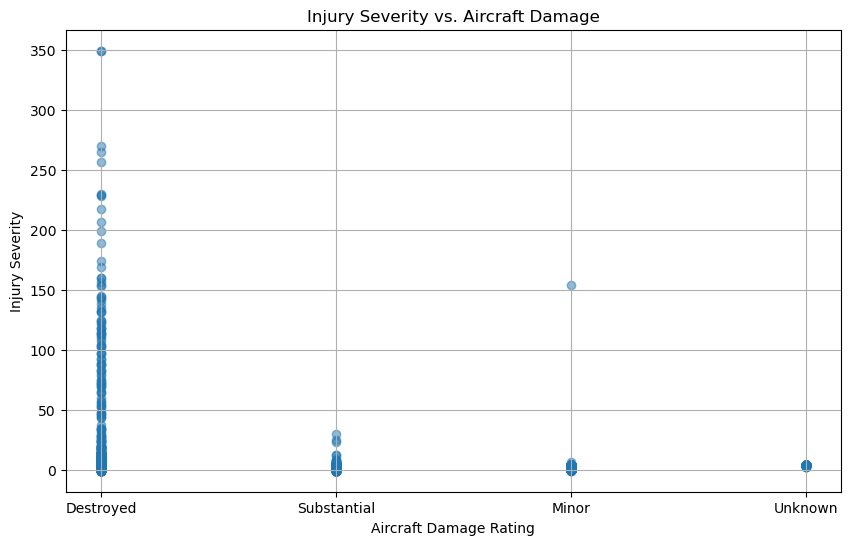

In [11]:
# Scatter plot of Injury Severity vs. Aircraft Damage
plt.figure(figsize=(10, 6))
plt.scatter(df['Aircraft.damage'], df['Injury.Severity'], alpha=0.5)
plt.title('Injury Severity vs. Aircraft Damage')
plt.xlabel('Aircraft Damage Rating')
plt.ylabel('Injury Severity')
plt.grid(True)
plt.show()


Understanding the number of accidents that happen at each broad phase of flight

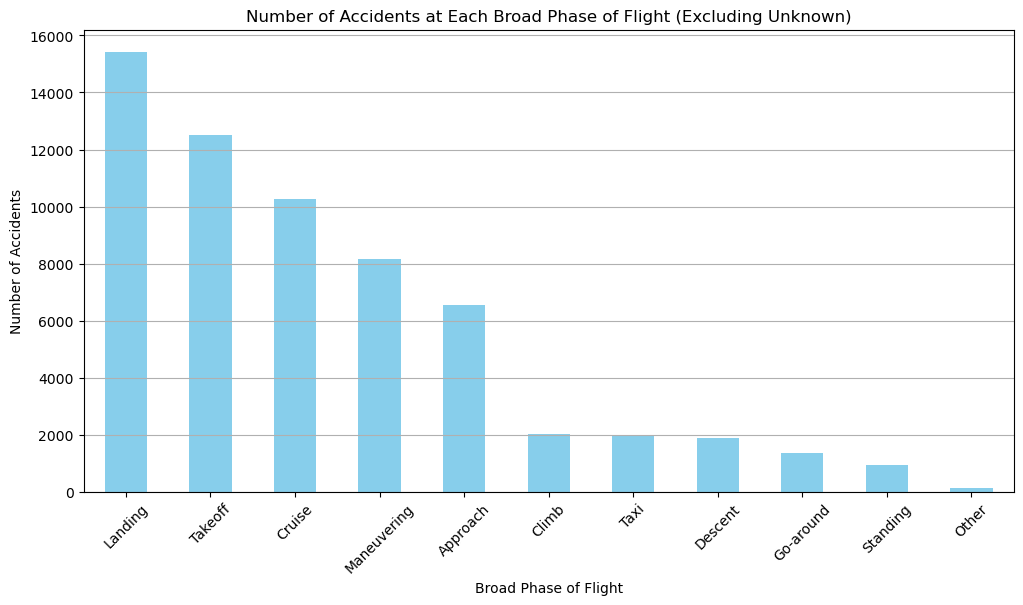

In [12]:
# Filter out rows where Broad.phase.of.flight is 'Unknown'
filtered_df = df[df['Broad.phase.of.flight'] != 'Unknown']

# Count the number of accidents at each broad phase of flight
phase_counts = filtered_df['Broad.phase.of.flight'].value_counts()

# Bar chart for the number of accidents at each broad phase of flight
plt.figure(figsize=(12, 6))
phase_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents at Each Broad Phase of Flight (Excluding Unknown)')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Severity of accidents at each stage

In [13]:
# Find unique values in each column
unique_broad_phase = df['Broad.phase.of.flight'].unique()
unique_injury_severity = df['Injury.Severity'].unique()
unique_fatal_injuries = df['Total.Fatal.Injuries'].unique()
unique_serious_injuries = df['Total.Serious.Injuries'].unique()
unique_minor_injuries = df['Total.Minor.Injuries'].unique()
unique_uninjured = df['Total.Uninjured'].unique()
# Print unique values
print("Unique Values in Broad Phase of Flight:", unique_broad_phase)
print("Unique Values in Injury Severity:", unique_injury_severity)
print("Unique Values in Total Fatal Injuries:", unique_fatal_injuries)
print("Unique Values in Total Serious Injuries:", unique_serious_injuries)
print("Unique Values in Total Minor Injuries:", unique_minor_injuries)
print("Unique Values in Total Uninjured:", unique_uninjured)

Unique Values in Broad Phase of Flight: ['Cruise' 'Unknown' 'Approach' 'Climb' 'Takeoff' 'Landing' 'Taxi'
 'Descent' 'Maneuvering' 'Standing' 'Go-around' 'Other']
Unique Values in Injury Severity: [  2   4   3   1   0   8  78   7   6   5 153  12  14  23  10  11   9  17
  13  29  70  -1 135  31 256  25  82 156  28  18  43  15 270 144 174 111
 131  20  73  27  34  87  30  16  47  56  37 132  68  54  52  65  72 160
 189 123  33 110 230  97 349 125  35 228  75 104 229  80 217 169  88  19
  60 113 143  83  24  44  64  92 118 265  26 138 206  71  21  46 102 115
 141  55 121  45 145 117 107 124  49 154  96 114 199  89  57]
Unique Values in Total Fatal Injuries: [  2.   4.   3.   1.   0.   8.  78.   7.   6.   5. 153.  12.  14.  23.
  10.  11.   9.  17.  13.  29.  70. 135.  31. 256.  25.  82. 156.  28.
  18.  43.  15. 270. 144. 174. 111. 131.  20.  73.  27.  34.  87.  30.
  16.  47.  56.  37. 132.  68.  54.  52.  65.  72. 160. 189. 123.  33.
 110. 230.  97. 349. 125.  35. 228.  75. 104. 229.  8

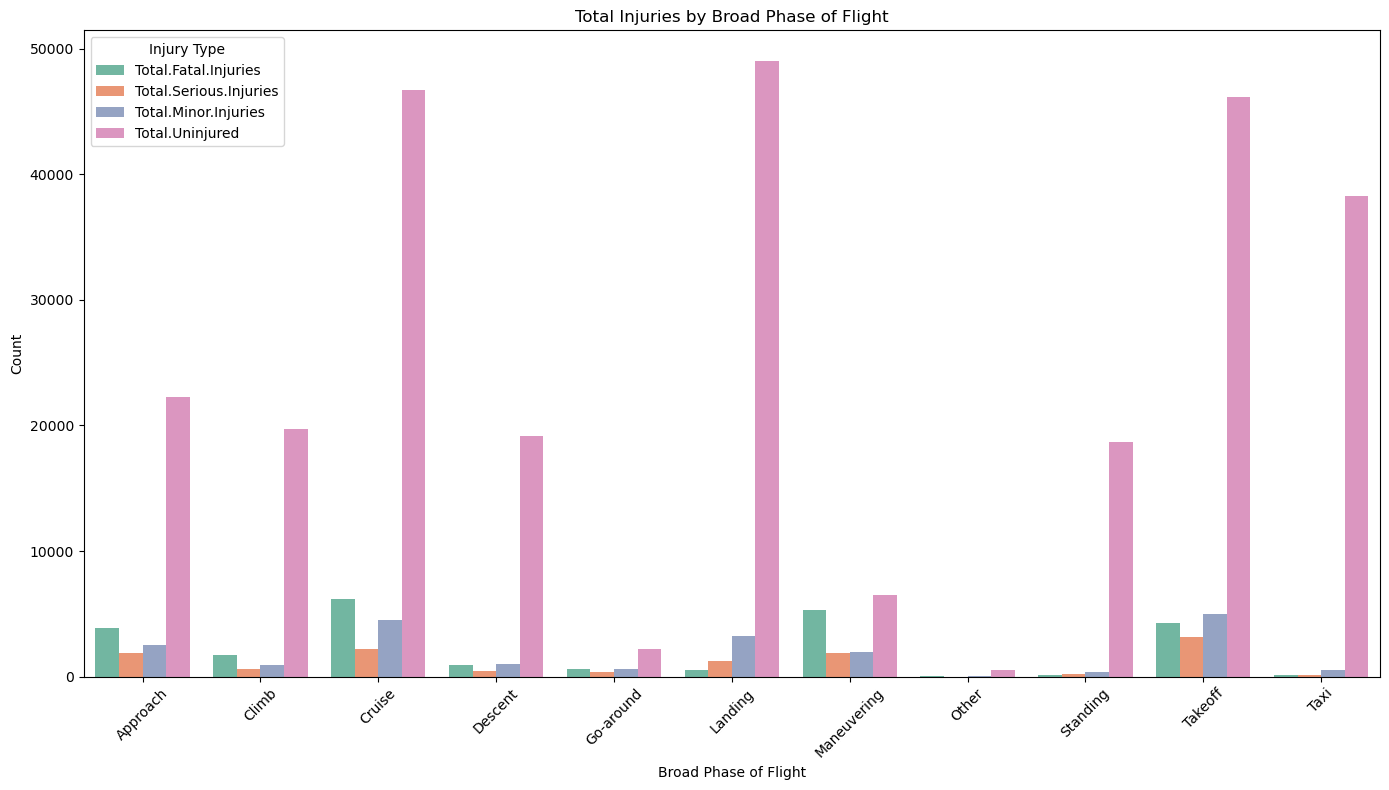

In [14]:
# Convert relevant columns to numeric, coerce errors to NaN
numeric_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Replace 'Unknown' in 'Broad.phase.of.flight' with NaN
df['Broad.phase.of.flight'].replace('Unknown', np.nan, inplace=True)

# Drop rows with NaN values in 'Broad.phase.of.flight'
df.dropna(subset=['Broad.phase.of.flight'], inplace=True)

# Drop rows with NaN values if necessary
df.dropna(subset=numeric_columns, inplace=True)

# Group by 'Broad.phase.of.flight' and sum the injury columns
df_grouped = df.groupby('Broad.phase.of.flight')[numeric_columns].sum().reset_index()

# Melt the DataFrame to long format for easier plotting
df_melted = pd.melt(df_grouped, id_vars=['Broad.phase.of.flight'], 
                    value_vars=numeric_columns,
                    var_name='Injury Type', value_name='Count')

# Plot a single grouped bar plot for all injury types
plt.figure(figsize=(14, 8))
sns.barplot(x='Broad.phase.of.flight', y='Count', hue='Injury Type', data=df_melted, palette='Set2')
plt.title('Total Injuries by Broad Phase of Flight')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Injury Type')

plt.tight_layout()
plt.show()


Correlation between accidents and weather conditions

In [15]:
# Display unique values in the 'Weather.Condition' column
unique_weather_conditions = df['Weather.Condition'].unique()

# Print the unique values
print("Unique values in Weather.Condition:")
print(unique_weather_conditions)

Unique values in Weather.Condition:
['UNK' 'IMC' 'VMC' 'Unk']


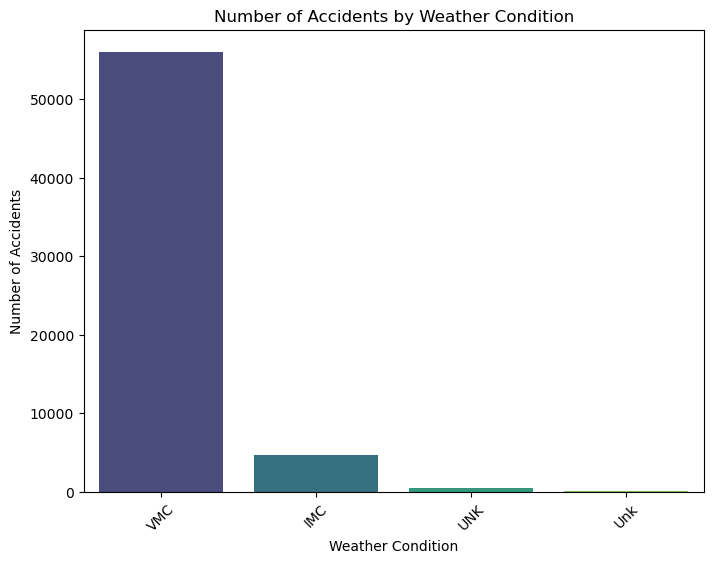

In [16]:
# Group by 'Weather.Condition' and count the number of accidents
weather_accidents = df['Weather.Condition'].value_counts().reset_index()
weather_accidents.columns = ['Weather.Condition', 'Accident Count']

# Plot the number of accidents by weather condition
plt.figure(figsize=(8, 6))
sns.barplot(x='Weather.Condition', y='Accident Count', data=weather_accidents, palette='viridis')
plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Correlation between Aircraft category,injuries and number of accidents

In [17]:
# Display unique values in 'Aircraft.Category'
unique_aircraft_category = df['Aircraft.Category'].unique()
print("Unique values in Aircraft.Category:")
print(unique_aircraft_category)


Unique values in Aircraft.Category:
['Unknown' 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft'
 'Ultralight' 'Blimp' 'Powered-Lift']


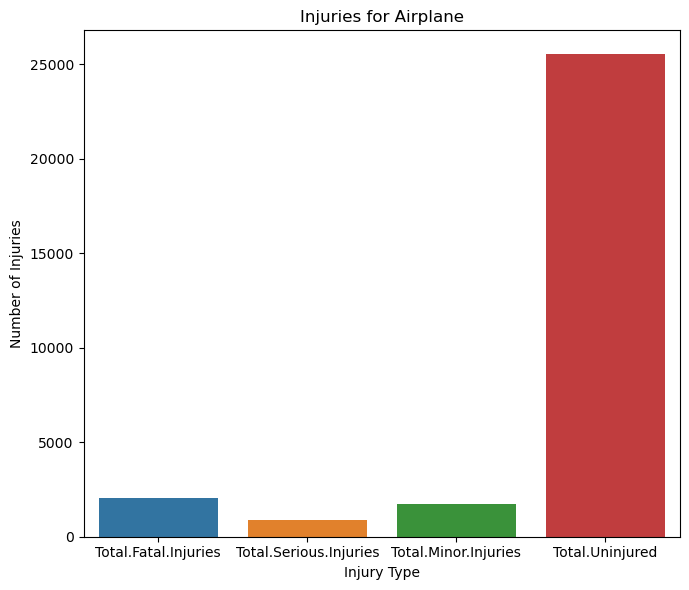

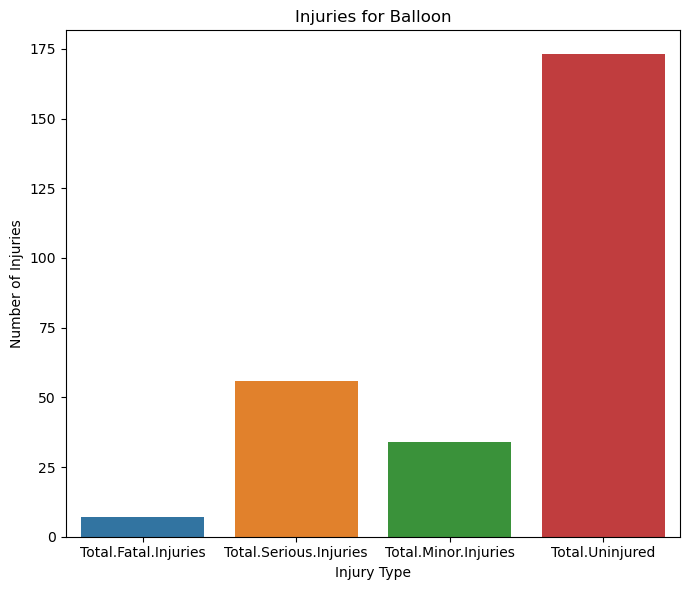

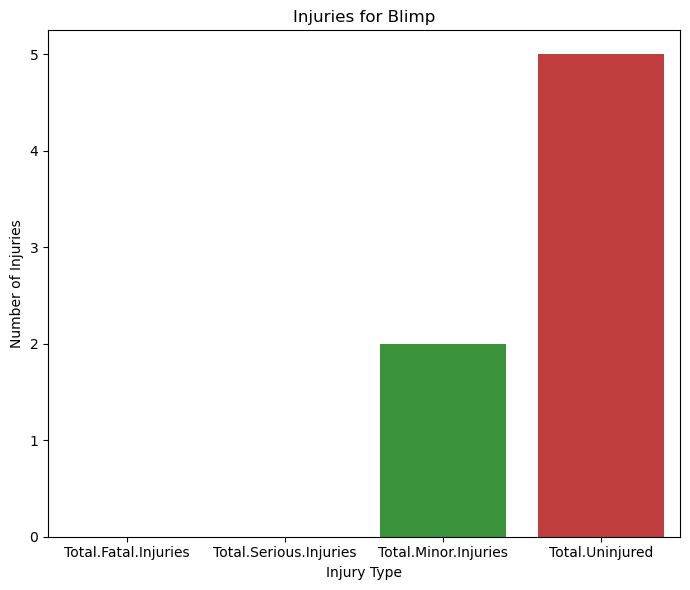

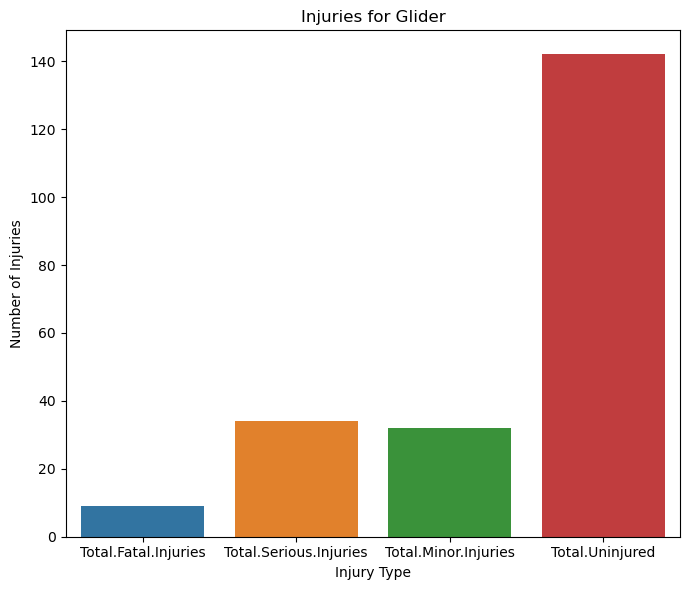

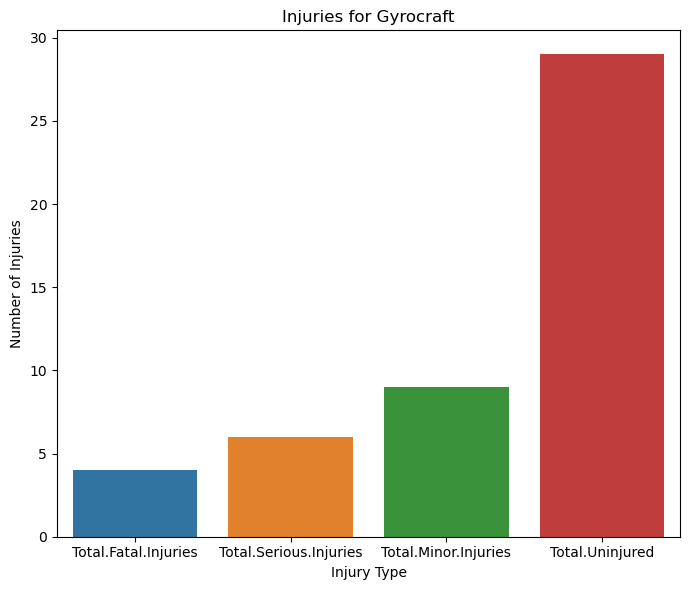

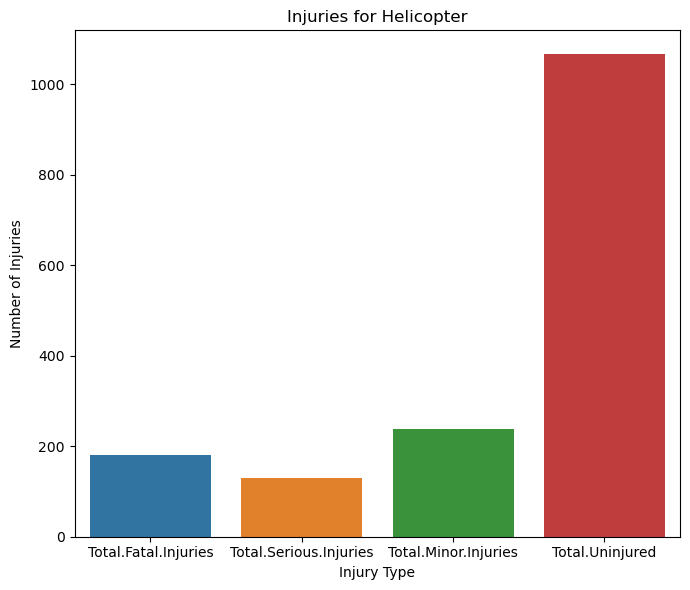

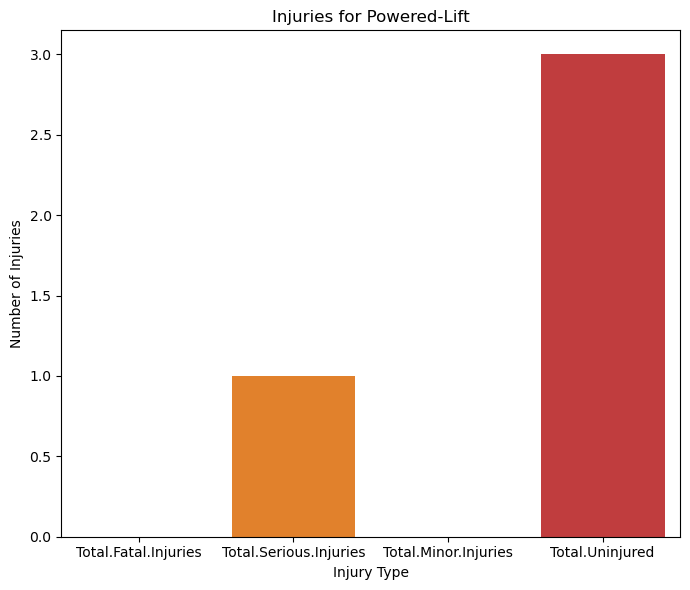

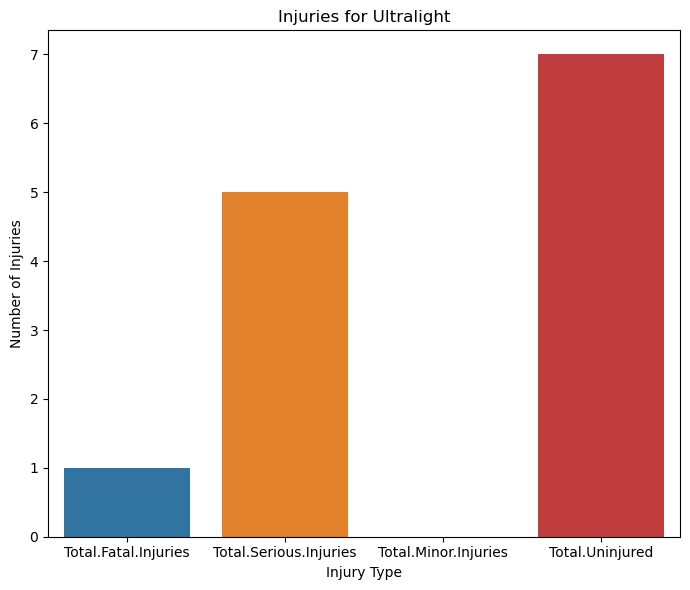

In [18]:
# Drop rows where 'Aircraft.Category' is 'Unknown'
df = df[df['Aircraft.Category'] != 'Unknown']

# Convert relevant columns to numeric, coerce errors to NaN
numeric_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Group by 'Aircraft.Category' and sum the injury columns
df_grouped_category = df.groupby('Aircraft.Category')[numeric_columns].sum().reset_index()

# Calculate the number of accidents by 'Aircraft.Category'
df_grouped_category['Number of Accidents'] = df.groupby('Aircraft.Category').size().values

# Melt the DataFrame for injuries for easier plotting
df_melted_injuries = pd.melt(df_grouped_category, id_vars=['Aircraft.Category'], 
                             value_vars=numeric_columns,
                             var_name='Injury Type', value_name='Count')

# Plotting the injuries by aircraft category for each category individually
unique_categories = df_melted_injuries['Aircraft.Category'].unique()

for category in unique_categories:
    plt.figure(figsize=(7, 6))
    sns.barplot(x='Injury Type', y='Count', data=df_melted_injuries[df_melted_injuries['Aircraft.Category'] == category])
    plt.title(f'Injuries for {category}')
    plt.xlabel('Injury Type')
    plt.ylabel('Number of Injuries')
    plt.tight_layout()
    plt.show()


Saving the cleaned data

In [19]:
# Export cleaned data to CSV for Tableau
df_cleaned.to_csv('cleaned_data_tableau.csv', index=False)